# DSR - Practical 3 - Backprop on a single artificial Neuron



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import random

In [52]:
class Perceptron:
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        random.seed(42)
        self.W = np.random.randn(N, 1)
        self.alpha = alpha
        

    def sigmoid_activation(self, x):
        # compute the sigmoid activation value for a given input
        ### ENTER YOUR CODE HERE
        return 1 / (1 + np.exp(-x)) 
        

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that the input `x` has already been passed through the sigmoid
        # activation function
         ### ENTER YOUR CODE HERE
        return x*(1 - x)
        
    
    def predict(self,x):
              # take the dot product between our features and weight matrix
             # and pass it through the activation function
         ### ENTER YOUR CODE HERE
        return self.sigmoid_activation(np.dot(x, self.W))
            
    def fit(self, X, y, epochs):
        # initialize our weight matrix and list of losses
        print("training...")
        # loop over the desired number of epochs
        for e in np.arange(0, epochs):
            
            preds = self.predict(X)
            # now that we have our predictions, we need to determine the
            # `error`, which is the difference between our predictions and
            # the true values
            # ENTER YOUR CODE HERE
            error = y - preds
            # use MSE
            loss = sum(error**2)/len(self.W)
            
            # the gradient descent update is the dot product between our
            # (1) features (X) and (2) the error of the sigmoid derivative of
            # our predictions
            d = error * self.sigmoid_deriv(preds)
            gradient = np.dot(X.T,d)
            # in the update stage, all we need to do is "nudge" the weight
            # matrix in the negative direction of the gradient (hence the
            # term "gradient descent" by taking a small step towards a set
            # of "more optimal" parameters
            self.W += self.alpha * gradient
            # check to see if an update should be displayed
            if e == 0 or (e + 1) % 1 == 0:
                print("epoch= ",int(e+1),", loss= ",loss)

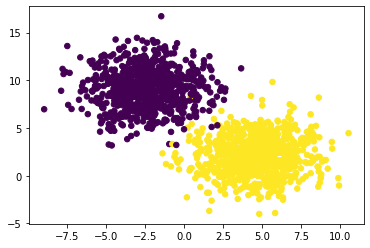

In [60]:
# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1600, n_features=2, centers=2,
cluster_std=2, random_state=42)
y = y.reshape((y.shape[0], 1))
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y[:, 0], s=30)

# insert a column of 1's as the last entry in the feature
# matrix -- so we can train the bias as part of the weights
X = np.c_[X, np.ones((X.shape[0]))]
          
# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

In [61]:
### Modify Perceptron Class such that you save the training losses and return them 


class Perceptron:
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        random.seed(42)
        self.W = np.random.randn(N, 1)
        self.alpha = alpha
        

    def sigmoid_activation(self, x):
        # compute the sigmoid activation value for a given input
        ### ENTER YOUR CODE HERE
        return 1 / (1 + np.exp(-x)) 
        

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that the input `x` has already been passed through the sigmoid
        # activation function
         ### ENTER YOUR CODE HERE
        return x*(1-x)
        
    
    def predict(self,x):
              # take the dot product between our features and weight matrix
             # and pass it through the activation function
         ### ENTER YOUR CODE HERE
        return self.sigmoid_activation(np.dot(x, self.W))
            
    def fit(self, X, y, epochs):
        # initialize our weight matrix and list of losses
        print("training...")
        train_loss = []
        # loop over the desired number of epochs
        for e in np.arange(0, epochs):
            
            preds = self.predict(X)
            # now that we have our predictions, we need to determine the
            # `error`, which is the difference between our predictions and
            # the true values
            # ENTER YOUR CODE HERE
            error = y - preds
            # use MSE
            loss = sum(error**2)/len(self.W)
            train_loss.append(loss)
            # the gradient descent update is the dot product between our
            # (1) features (X) and (2) the error of the sigmoid derivative of
            # our predictions
            d = error * self.sigmoid_deriv(preds)
            gradient = np.dot(X.T,d)
            # in the update stage, all we need to do is "nudge" the weight
            # matrix in the negative direction of the gradient (hence the
            # term "gradient descent" by taking a small step towards a set
            # of "more optimal" parameters
            self.W += self.alpha * gradient
            # check to see if an update should be displayed
            if e == 0 or (e + 1) % 1 == 0:
                print("epoch= ",int(e+1),", loss= ",loss)
        
        return train_loss
        

training...
epoch=  1 , loss=  [109.38537615]
epoch=  2 , loss=  [62.54092736]
epoch=  3 , loss=  [47.34612609]
epoch=  4 , loss=  [43.08044891]
epoch=  5 , loss=  [37.71273367]
epoch=  6 , loss=  [31.86800546]
epoch=  7 , loss=  [26.31061004]
epoch=  8 , loss=  [24.44636178]
epoch=  9 , loss=  [21.88546424]
epoch=  10 , loss=  [20.33066585]
epoch=  11 , loss=  [18.01511792]
epoch=  12 , loss=  [15.43993263]
epoch=  13 , loss=  [14.28240066]
epoch=  14 , loss=  [13.89401115]
epoch=  15 , loss=  [13.34287511]
epoch=  16 , loss=  [12.86619881]
epoch=  17 , loss=  [12.52919178]
epoch=  18 , loss=  [12.28998218]
epoch=  19 , loss=  [11.99936198]
epoch=  20 , loss=  [11.3762249]
epoch=  21 , loss=  [11.00139702]
epoch=  22 , loss=  [10.68422951]
epoch=  23 , loss=  [9.91609605]
epoch=  24 , loss=  [8.36877019]
epoch=  25 , loss=  [7.67928248]
epoch=  26 , loss=  [7.28519937]
epoch=  27 , loss=  [6.9376043]
epoch=  28 , loss=  [6.36456312]
epoch=  29 , loss=  [5.87396372]
epoch=  30 , loss= 

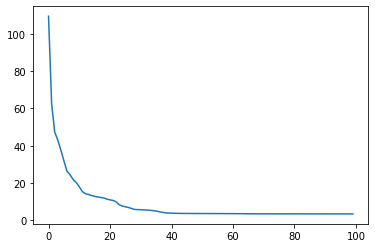

In [62]:
epochs = 100
alpha = 0.001
# create Perceptron object and train
p = Perceptron(3)
train_loss = p.fit(trainX, trainY, epochs=epochs)
plt.plot(train_loss)

In [63]:
# evaluate our model
print("evaluating...")
preds = p.predict(testX)
# apply a step function to threshold the outputs to binary
# class labe|ls
preds[preds <= 0.5] = 0
preds[preds > 0.5] = 1
print(classification_report(testY, preds))

evaluating...
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       403
           1       1.00      0.96      0.98       397

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



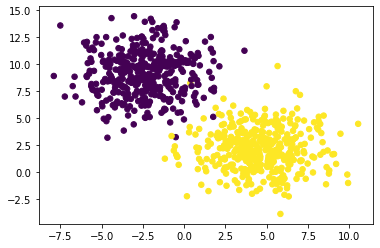

In [64]:
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

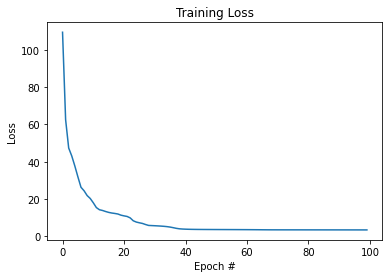

In [65]:
# plot the losses as function of epochs
plt.plot(np.arange(0, epochs), train_loss)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

### Gradient Descent can be very slow and wasteful.
#### Especially if you are dealing with big data sets the computation becomes very coastly, yielding huge matrix calculations 
$$ W \cdot{X}   $$
#### the following is a more efficient way to perform GD with faster convergence.

## Stochastic Gradient descent
### instead of updating the weights on an entire epoch we do more updates on mini-batches of data.
### This way we have multiple updates per epoch.

#### implement sgd in our perceptron class (batches of 16)

In [74]:
### Modify Perceptron Class such that you save the training losses and return them 


class Perceptron:
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        random.seed(42)
        self.W = np.random.randn(N, 1)
        self.alpha = alpha
        

    def sigmoid_activation(self, x):
        # compute the sigmoid activation value for a given input
        ### ENTER YOUR CODE HERE
        return 1 / (1 + np.exp(-x)) 
        

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that the input `x` has already been passed through the sigmoid
        # activation function
         ### ENTER YOUR CODE HERE
        return x*(1-x)
        
    
    def predict(self,x):
              # take the dot product between our features and weight matrix
             # and pass it through the activation function
         ### ENTER YOUR CODE HERE
        return self.sigmoid_activation(np.dot(x, self.W))
            
    def fit(self, X, y, epochs,batch_size):
        # initialize our weight matrix and list of losses
        print("training...")
        train_loss = []
        # loop over the desired number of epochs
        for e in np.arange(0, epochs):
            x_batched = np.split(X, len(X/batch_size))
            y_batched = np.split(y, len(y/batch_size))
            for ind, xb in enumerate(x_batched):
                preds = self.predict(xb)
                # now that we have our predictions, we need to determine the
                # `error`, which is the difference between our predictions and
                # the true values
                # ENTER YOUR CODE HERE
                error = y_batched[ind] - preds
                # use MSE
                loss = np.sum(error**2)/batch_size
                train_loss.append(loss)
                # the gradient descent update is the dot product between our
                # (1) features (X) and (2) the error of the sigmoid derivative of
                # our predictions
                d = error * self.sigmoid_deriv(preds)
                gradient = np.dot(xb.T,d)
                # in the update stage, all we need to do is "nudge" the weight
                # matrix in the negative direction of the gradient (hence the
                # term "gradient descent" by taking a small step towards a set
                # of "more optimal" parameters
                self.W += self.alpha * gradient
                # check to see if an update should be displayed
            if e == 0 or (e + 1) % 1 == 0:
                print("epoch= ",int(e+1),", loss= ",loss)
        
        return train_loss
        

training...
epoch=  1 , loss=  8.222409838115162e-08
epoch=  2 , loss=  4.230865878341832e-08
epoch=  3 , loss=  2.697494924476624e-08
epoch=  4 , loss=  1.965004292547121e-08
epoch=  5 , loss=  1.565106057565223e-08
epoch=  6 , loss=  1.3268126731202248e-08
epoch=  7 , loss=  1.1759090290608931e-08
epoch=  8 , loss=  1.0758538057962943e-08
epoch=  9 , loss=  1.0068074153789428e-08
epoch=  10 , loss=  9.571248408120515e-09
epoch=  11 , loss=  9.195400599043421e-09
epoch=  12 , loss=  8.893149808380692e-09
epoch=  13 , loss=  8.63280239322784e-09
epoch=  14 , loss=  8.393057155210967e-09
epoch=  15 , loss=  8.15987110428854e-09
epoch=  16 , loss=  7.924448952954435e-09
epoch=  17 , loss=  7.681841102488515e-09
epoch=  18 , loss=  7.429894428636487e-09
epoch=  19 , loss=  7.16843144038821e-09
epoch=  20 , loss=  6.8985981118589124e-09
epoch=  21 , loss=  6.622350157346095e-09
epoch=  22 , loss=  6.342058889851883e-09
epoch=  23 , loss=  6.060220813244482e-09
epoch=  24 , loss=  5.7792551

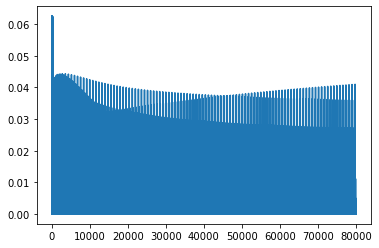

In [75]:
epochs = 100
alpha = 0.001
# create Perceptron object and train
p = Perceptron(3)
train_loss = p.fit(trainX, trainY, epochs=epochs, batch_size=16)
plt.plot(train_loss)

In [66]:
# create a perceptron object and train it save the losses as losses2 and compare the 
# losses of the current and former percptrons
epochs = 100
alpha = 0.01
p = 
losses2 = 

SyntaxError: invalid syntax (1058365639.py, line 5)

In [ ]:
#plot the losses of both perceptrons


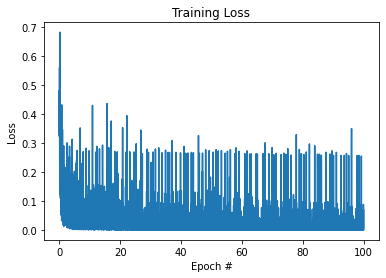

In [ ]:

plt.plot(np.arange(0, len(losses2))/50, losses2)

plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()